In [46]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Classification rates

In [47]:
import sklearn
import sklearn.neighbors
import sklearn.metrics
import pandas
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [48]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y = Y==2 ### is it a virginica??
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)

In [52]:
knn_iris = sklearn.neighbors.KNeighborsClassifier(n_neighbors=30)
knn_iris.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [53]:
cf=sklearn.metrics.confusion_matrix(Y_test, knn_iris.predict(X_test))
pandas.DataFrame(cf,('true %i'%x for x in range(2)),('pred %i'%x for x in range(2)))


,pred 0,pred 1
true 0,48,3
true 1,6,18


In [54]:
knn_iris.predict(X_test)

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True])

In [55]:
knn_iris.predict_proba(X_test)

array([[0.43333333, 0.56666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.13333333, 0.86666667],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.46666667, 0.53333333],
       [0.66666667, 0.33333333],
       [0.36666667, 0.63333333],
       [0.56666667, 0.43333333],
       [0.6       , 0.4       ],
       [0.53333333, 0.46666667],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.53333333, 0.46666667],
       [0.63333333, 0.36666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.

In [61]:
cf=sklearn.metrics.confusion_matrix(Y_test, 
                                    knn_iris.predict_proba(X_test)[:,1]>=.3)
pandas.DataFrame(cf,('true %i'%x for x in range(2)),('pred %i'%x for x in range(2)))


,pred 0,pred 1
true 0,23,28
true 1,0,24


Text(0.5,0,'$\\hat P(True|X)$')

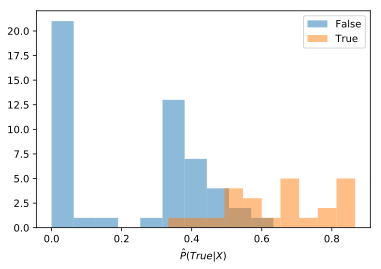

In [62]:
hist(knn_iris.predict_proba(X_test)[~Y_test,1], label='False', alpha=.5)
hist(knn_iris.predict_proba(X_test)[Y_test,1], label='True', alpha=.5)
legend()
xlabel('$\hat P(True|X)$')

Text(0,0.5,'tpr')

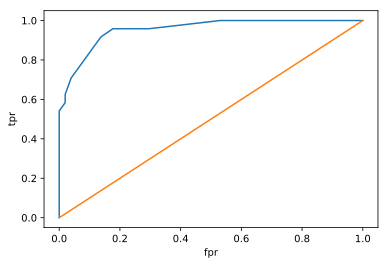

In [63]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, knn_iris.predict_proba(X_test)[:,1])
plot(fpr,tpr)
plot([0,1],[0,1])
xlabel('fpr')
ylabel('tpr')

In [64]:
sklearn.metrics.roc_auc_score(Y_test, knn_iris.predict_proba(X_test)[:,1])

0.954248366013072

Text(0,0.5,'recall')

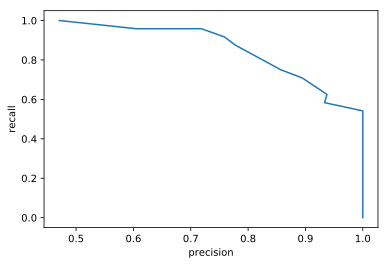

In [65]:
pre, rec, thresholds = sklearn.metrics.precision_recall_curve(Y_test, knn_iris.predict_proba(X_test)[:,1])
plot(pre,rec)
xlabel('precision')
ylabel('recall')

Linear regression

In [ ]:
from sklearn import linear_model

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
pandas.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [ ]:
diabetes_X = diabetes.data[:, np.newaxis, 2] ## bmi
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)


In [ ]:
print 'model: y = %f + %f * BMI' % (regr.intercept_, regr.coef_)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error of OLS: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Variance of Y: %.2f"
      % np.var(diabetes_y_test))
print('Percent of variance explained: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


In [ ]:
plt.scatter(diabetes_X_train[:50], diabetes_y_train[:50],  color='black')
plt.plot(diabetes_X_train[:50], regr.predict(diabetes_X_train[:50]), color='blue', linewidth=3)

plt.xlabel('bmi')
plt.ylabel('y')
plt.title('training')
plt.show()


In [ ]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xlabel('bmi')
plt.ylabel('y')
plt.title('test')
plt.show()
